# Escola de Dados - Python para inovação cívica

## Semana 3: Análise exporatória de dados do Legislativo

* [Aula 02: Acessando os dados da CEAP via API](#Aula-02:-Acessando-os-dados-da-CEAP-via-API)
* [Aula 03: Lendo os dados com Pandas](#Aula-03:-Lendo-os-dados-com-Pandas)
    * [Dicionário de dados](#Dicionário-de-Dados)
* [Aula 04: Organizando e visualizando os dados](#Aula-04:-Organizando-e-visualizando-os-dados)
    * [Informando tipos na leitura dos dados](#Informando-tipos-na-leitura-dos-dados)
    * [Preenchendo valores nulos](#Preenchendo-valores-nulos)
    * [Sugestões de transformações](#Sugestões-de-transformações)
* [Aula 07: Dados da Receita Federal](#Aula-07:-Dados-da-Receita-Federal)

---

## Aula 02: Acessando os dados da CEAP via API

Para baixar os arquivos das despesas pela **Cota para Exercício da Atividade Parlamentar** (CEAP), podemos utilizar a API da Câmara Legislativa. Os arquivos de cada ano estão disponíveis via URLs no formato `http://www.camara.leg.br/cotas/Ano-{ano}.{formato}[.zip]`.

Você pode encontrar mais detalhes na [documentação dos dados sobre Despesas pela Cota para Exercício da Atividade Parlamentar](https://dadosabertos.camara.leg.br/swagger/api.html#staticfile).

Há diversas formas de fazer o download dos arquivos usando Python. Para esse tutorial, vamos usar o pacote `requests`.

In [2]:
url = f"http://www.camara.leg.br/cotas/Ano-2019.csv.zip"

In [3]:
import requests

# fazendo o download do conteúdo do arquivo
r = requests.get(url)

In [4]:
# abrindo um arquivo no seu computador
file = open(f"Ano-2019.csv.zip", "wb")

# escrever o conteúdo
file.write(r.content)
file.close()

In [5]:
# outra forma de criar arquivos, e escrever conteúdo

# with open(f"Ano-{year}.csv.zip", "wb") as code:
#    code.write(r.content)

Como o arquivo baixado pela API é um arquivo zip, vamos precisar descompatar. Vamos usar o `zipfile`, um módulo que nos dá ferramentas para diversas manipulações de arquivos zipados.

In [6]:
from zipfile import ZipFile

In [7]:
# Lê o arquivo zip baixado
zip_file = ZipFile(f"Ano-2019.csv.zip", "r")

In [8]:
# Lista os arquivos dentro do arquivo compactado .zip
zip_file.namelist()

['Ano-2019.csv']

In [9]:
# Extrair o arquivo selecionado na propriedade member
zip_file.extract(member=f"Ano-2019.csv", path=f"reembolso-2019")

'reembolso-2019/Ano-2019.csv'

In [ ]:
# caso a gente queira extrair todo o conteúdo do arquivo zip (descomentar a linha a seguir)

# zip_file.extractall(path=f"reimbursements-{year}")

In [10]:
zip_file.close()

### Documentações para consulta

1. requests - [Documentação](https://requests.readthedocs.io/en/latest/)
2. zipfile - [Documentação](https://docs.python.org/pt-br/3/library/zipfile.html)

## Aula 03: Lendo os dados com Pandas

In [11]:
import pandas as pd

pd.set_option("display.max_columns", None)  # Configuração para ajuda na legibilidade das tabelas

In [12]:
df = pd.read_csv("reembolso-2019/Ano-2019.csv", sep=";")

In [ ]:
df.head()

Opa! Erro na leitura do nosso arquivo. Quando encontramos esse erro na leitura de um arquivo, existe algumas possíveis causas mais comuns, uma delas é que o caracter que separa as colunas pode não ser o que o `read_csv` espera.

Encontre na [documentação do read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) qual o separador considerado padrão e depois confira no arquivo qual o separador que é utilizado.

Agora, modifique a próxima célula com o que você acha que deve ser feito para que a leitura do csv aconteça sem erros.

In [14]:
df_reembolso = pd.read_csv("reembolso-2019/Ano-2019.csv", sep=";")
#sep == delimiter

Vamos visualizar as 5 primeiras linhas do nosso Dataframe.

In [ ]:
df_reembolso.head()

#### Como podemos fazer para visualizar as 10 primeiras linhas?

*Escreva e rode o código na célula abaixo.*

In [ ]:
df_reembolso.head(10)

Podemos também recuperar uma amosta aleatória do nosso Dataframe. Para isso, usamos o [`sample`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html).

In [ ]:
df_reembolso.sample()

#### Como podemos fazer para visualizar 5 amostras aleatórias?

*Escreva e rode o código na célula abaixo.*

In [18]:
df_reembolso.sample(5)

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,numEspecificacaoSubCota,txtDescricaoEspecificacao,txtFornecedor,txtCNPJCPF,txtNumero,indTipoDocumento,datEmissao,vlrDocumento,vlrGlosa,vlrLiquido,numMes,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,datPagamentoRestituicao,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
170426,Moses Rodrigues,4.772174e+10,178997.0,106.0,2019,CE,UNIÃO,56,999,PASSAGEM AÉREA - RPA,0,NaN,Cia Aérea - TAM,020.128.620/0016-0,Bilhete: 957-2197.631579,0,2019-04-30T00:00:00,86.00,0.00,86.00,4,2019,0,Moses Rodrigues,FOR/BSB,0,0.0,NaN,NaN,3041,1666464,NaN
55014,JARBAS VASCONCELOS,1.054574e+08,131943.0,147.0,2015,PE,MDB,55,999,PASSAGEM AÉREA - RPA,0,NaN,Cia Aérea - GOL,075.756.510/0015-9,Bilhete: QRGZ6R,0,2019-01-03T00:00:00,926.17,0.00,926.17,1,2019,0,BRUNO SILVA,REC/BSB,0,0.0,NaN,NaN,2908,1633060,NaN
122018,Fabio Reis,5.712650e+10,171623.0,178.0,2019,SE,PSD,56,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0,NaN,ENERGISA SERGIPE - DISTRIBUIDORA DE ENERGIA S.A,130.174.620/0016-3,011153249,0,2019-02-19T00:00:00,182.32,2.62,179.70,2,2019,0,NaN,NaN,1571141,NaN,NaN,NaN,2820,6772594,https://www.camara.leg.br/cota-parlamentar/doc...
132650,Paulo Azi,2.887065e+10,178860.0,215.0,2019,BA,UNIÃO,56,999,PASSAGEM AÉREA - RPA,0,NaN,Cia Aérea - TAM,020.128.620/0016-0,Bilhete: 957-2102.120036,0,2019-06-19T00:00:00,1434.98,0.00,1434.98,6,2019,0,Paulo Azi,SSA/BSB,0,0.0,NaN,NaN,2929,1674712,NaN
196898,Schiavinato,2.769609e+10,204399.0,469.0,2019,PR,PP,56,11,SERVIÇOS POSTAIS,0,NaN,ECT - EMPRESA BRASILEIRA DE CORREIOS E TELEGR...,340.283.162/7040-2,1598777470,1,2019-02-12T00:00:00,59.80,0.00,59.80,2,2019,0,NaN,NaN,1568724,NaN,NaN,NaN,3229,6766078,https://www.camara.leg.br/cota-parlamentar/doc...


### Dicionário de Dados

Um passo importante para dar antes de começar a análisar é **entender os dados que estamos manipulando**.

*Sempre procure o significado dos campos, procure entender quais os tipos de dados preenchem aquele campo. São dados numéricos? São caracteres? Não palavras usadas para categorizar/classificar os dados?*

| Elemento de Dado          | Nome do Dado                           | Definição do Dado                                                                                                                                                                                                                                                                                                                                                                                                                   |   |   |
|---------------------------|----------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---|---|
| txNomeParlamentar         | Nome Parlamentar                       | Nome adotado pelo Parlamentar ao tomar posse do seu mandato. Compõe-se de dois elementos: um prenome e o nome; dois nomes; ou dois prenomes, salvo, a juízo do Presidente da Casa legislativa, que poderá alterar essa regra para que não ocorram confusões.                                                                                                                                                                        |   |   |
| ideCadastro               | Identificador Único do Parlamentar     | Número que identifica unicamente um deputado federal na CD.                                                                                                                                                                                                                                                                                                                                                                         |   |   |
| nuCarteiraParlamentar     | Número da  Carteira Parlamentar        | Documento usado para identificar um deputado federal na CD. Pode alterar a cada Legislatura nova.                                                                                                                                                                                                                                                                                                                                   |   |   |
| nuLegislatura             | Número da  Legislatura                 | No contexto da cota CEAP, representa o ano base de início da legislatura e é utilizado para compor a Carteira Parlamentar, pois esta poderá ser alterada à medida que se muda de Legislatura.                                                                                                                                     |   |   |
| sgUF                      | Sigla da UF                            | No contexto da cota CEAP, representa a unidade da federação pela qual o deputado foi eleito e é utilizada para definir o valor da cota a que o deputado tem.                                                                                                                                                                                                                                                                        |   |   |
| sgPartido                 | Sigla do Partido                       | O seu conteúdo representa a sigla de um partido. Tem personalidade jurídica de direito privado e goza de autonomia e liberdade no que diz respeito à criação, organização e funcionamento, observados os princípios e preceitos constitucionais. |   |   |
| codLegislatura            | Código da Legislatura                  | No contexto da cota CEAP, o seu conteúdo representa o código identificador da Legislatura, que um número ordinal sequencial, alterado de um em um, a cada início de uma nova Legislatura (por exemplo, a Legislatura que iniciou em 2011 é a 54ª Legislatura).                                                                    |   |   |
| numSubCota                | Número da Subcota                      | No contexto da Cota CEAP, o conteúdo deste dado representa o código do Tipo de Despesa referente à despesa realizada pelo deputado e comprovada por meio da emissão de um documento fiscal, a qual é debitada na cota do deputado.                                                                                                                                                                                                  |   |   |
| txtDescricao              | Descrição da Subcota                   | O seu conteúdo é a descrição do Tipo de Despesa relativo à despesa em questão.                                                                                                                                                                                                                                                                                                                                                      |   |   |
| numEspecificacaoSubCota   | Número da Especificação da Subcota     | No contexto da Cota CEAP, há despesas cujo Tipo de Despesa necessita ter uma especificação mais detalhada (por exemplo, “Combustível”). O conteúdo deste dado representa o código desta especificação mais detalhada.                                                                                                                                                                                                               |   |   |
| txtDescricaoEspecificacao | Descrição da Especificação da Subcota  | Representa a descrição  especificação mais detalhada de um referido Tipo de Despesa.                                                                                                                                                                                                                                                                                                                                                |   |   |
| txtFornecedor             | Fornecedor                             | O conteúdo deste dado representa o nome do fornecedor do produto ou serviço presente no documento fiscal                                                                                                                                                                                                                                                                                                                            |   |   |
| txtCNPJCPF                | CNPJ/CPF                               | O conteúdo deste dado representa o CNPJ ou o CPF do emitente do documento fiscal, quando se tratar do uso da cota em razão do reembolso despesas comprovadas pela emissão de documentos fiscais.                                                                                                                                                                                                                                    |   |   |
| txtNumero                 | Número do Documento                    | O conteúdo deste dado representa o número de face do documento fiscal emitido ou o número do documento que deu causa à despesa debitada na cota do deputado.                                                                                                                                                                                                                                                                        |   |   |
| indTipoDocumento          | Indicativo de Tipo de Documento Fiscal | Este dado representa o tipo de documento do fiscal – 0 (Zero), para Nota Fiscal; 1 (um), para Recibo; e 2, para Despesa no Exterior.                                                                                                                                                                                                                                                                                                |   |   |
| datEmissao                | Data de Emissão                        | O conteúdo deste dado é a data de emissão do documento fiscal ou a data do documento que tenha dado causa à despesa.                                                                                                                                                                                                                                                                                                                |   |   |
| vlrDocumento              | Valor do Documento                     | O seu conteúdo é o valor de face do documento fiscal ou o valor do documento que deu causa à despesa. Quando se tratar de bilhete aéreo, esse valor poderá ser negativo, significando que o referido bilhete é um bilhete de compensação, pois compensa um outro bilhete emitido e não utilizado pelo deputado (idem para o dado vlrLiquido abaixo).                                                                                |   |   |
| vlrGlosa                  | Valor da Glosa                         | O seu conteúdo representa o valor da glosa do documento fiscal que incidirá sobre o Valor do Documento, ou o valor da glosa do documento que deu causa à despesa.                                                                                                                                                                                                                                                                   |   |   |
| vlrLiquido                | Valor Líquido                          | O seu conteúdo representa o valor líquido do documento fiscal ou do documento que deu causa à despesa e será calculado pela diferença entre o Valor do Documento e o Valor da Glosa. É este valor que será debitado da cota do deputado. Caso o débito seja do Tipo Telefonia e o valor seja igual a zero, significa que a despesa foi franqueada.                                                                                  |   |   |
| numMes                    | Mês                                    | O seu conteúdo representa o Mês da competência financeira do documento fiscal ou do documento que deu causa à despesa. É utilizado, junto com o ano, para determinar em que período o débito gerará efeito financeiro sobre a cota.                                                                                                                                                                                                 |   |   |
| numAno                    | Ano                                    | O seu conteúdo representa o Ano da competência financeira do documento fiscal ou do documento que deu causa à despesa. É utilizado, junto com o mês, para determinar em que período o débito gerará efeito financeiro sobre a cota.                                                                                                                                                                                                 |   |   |
| numParcela                | Número da Parcela                      | O seu conteúdo representa o número da parcela do documento fiscal. Ocorre quando o documento tem de ser reembolsado de forma parcelada.                                                                                                                                                                                                                                                                                             |   |   |
| txtPassageiro             | Passageiro                             | O conteúdo deste dado representa o nome do passageiro, quando o documento que deu causa à despesa se tratar de emissão de bilhete aéreo.                                                                                                                                                                                                                                                                                            |   |   |
| txtTrecho                 | Trecho                                 | O conteúdo deste dado representa o trecho da viagem, quando o documento que deu causa à despesa se tratar de emissão de bilhete aéreo.                                                                                                                                                                                                                                                                                              |   |   |
| numLote                   | Número do Lote                         | No contexto da Cota CEAP, o Número do Lote representa uma capa de lote que agrupa os documentos que serão entregues à Câmara para serem ressarcidos. Este dado, juntamente com o Número do Ressarcimento, auxilia a localização do documento no Arquivo da Casa.                                                                                                                                                                    |   |   |
| numRessarcimento          | Número do Ressarcimento                | No contexto da Cota CEAP, o Número do Ressarcimento indica o ressarcimento do qual o documento fez parte por ocasião do processamento do seu reembolso. Este dado, juntamente com o Valor da Restituição, auxilia a localização do documento no Arquivo da Casa.                                                                                                                                                                 |   |   |
|  vlrRestituicao           |  Valor da Restituição                  |  O seu conteúdo representa o valor restituído do documento fiscal que incidirá sobre o Valor do Documento.                                                                                                                                                                                                                                                                                                                          |   |   |
| nuDeputadoId              | Identificador do Solicitante           | Número que identifica um Parlamentar ou Liderança na Transparência da Cota para Exercício da Atividade Parlamentar.                                                                                                                                                                                                                                                                                                                 |   |   |


Legislatura: Período de quatro anos coincidente com o mandato parlamentar dos Deputados Federais.

Definição de partido: é uma organização formada por pessoas com interesse ou ideologia comuns, que se associam com o fim de assumir o poder para implantar um programa de governo.

*Fonte*: [EXPLICAÇÕES SOBRE O FORMATO DOS ARQUIVOS XML](https://www2.camara.leg.br/transparencia/cota-para-exercicio-da-atividade-parlamentar/explicacoes-sobre-o-formato-dos-arquivos-xml)

> Quais perguntas poderíamos responder com esses dados? E quais campos poderíamos utilizar?
Compartilhe com os outros alunos no grupo da disciplina no Discord.

## Aula 04: Organizando e visualizando os dados

### Informando tipos na leitura dos dados

Quando trabalhamos com pandas, é sempre interessante entender que tipos de dados estão contidos em cada coluna. Na leitura do arquivo podemos aproveitar para deixar isso configurado.

Isso pode ser extramamente útil quando estamos lendo dados que contém informação sobre documentos, como CPF. Nesses casos podemos ter algo como `091777777`, se esse valor por lido como um número, ele vai virar `91777777`, já que não existe número que inicie com 0. Esse é um ótimo exemplo de dado que deve ser lido como um string, para que ele seja preservado ao máximo.

Agora, sabendo quais dados nosso dataframe possui, vamos definir o tipo para cada um.

In [19]:
DTYPE = {
    "txNomeParlamentar": str,
    "ideCadastro": str,
    "nuCarteiraParlamentar": str,
    "nuLegislatura": str,
    "sgUF": str,
    "sgPartido": str,
    "codLegislatura": str,
    "numSubCota": str,
    "txtDescricao": str,
    "numEspecificacaoSubCota": str,
    "txtDescricaoEspecificacao": str,
    "txtFornecedor": str,
    "txtCNPJCPF": str,
    "txtNumero": str,
    "indTipoDocumento": str,
    "datEmissao": str,
    "vlrDocumento": float,
    "vlrGlosa": str,
    "vlrLiquido": float,
    "numMes": str,
    "numAno": str,
    "numParcela": str,
    "txtPassageiro": str,
    "txtTrecho": str,
    "numLote": str,
    "numRessarcimento": str,
    "nuDeputadoId": str,
    "ideDocumento": str,
}

df_reembolso = pd.read_csv(
    "reembolso-2019/Ano-2019.csv", delimiter=";", dtype=DTYPE, low_memory=False
)

Opa! Você lembra qual método podemos usar para conferir os tipos de cada coluna?

**dica**: já passamos por esse método...

In [20]:
df_reembolso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289453 entries, 0 to 289452
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   txNomeParlamentar          289453 non-null  object 
 1   cpf                        288449 non-null  float64
 2   ideCadastro                288548 non-null  object 
 3   nuCarteiraParlamentar      288548 non-null  object 
 4   nuLegislatura              289453 non-null  object 
 5   sgUF                       288548 non-null  object 
 6   sgPartido                  288548 non-null  object 
 7   codLegislatura             289453 non-null  object 
 8   numSubCota                 289453 non-null  object 
 9   txtDescricao               289453 non-null  object 
 10  numEspecificacaoSubCota    289453 non-null  object 
 11  txtDescricaoEspecificacao  64765 non-null   object 
 12  txtFornecedor              289438 non-null  object 
 13  txtCNPJCPF                 28

#### astype

In [ ]:
# df_reembolso["ideCadastro"] = df_reembolso["ideCadastro"].astype('string')

Vamos conhecer mais algumas operações que podem nos ajudar a visualizar e entender nossos dados.

In [21]:
df_reembolso.tail()

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,numEspecificacaoSubCota,txtDescricaoEspecificacao,txtFornecedor,txtCNPJCPF,txtNumero,indTipoDocumento,datEmissao,vlrDocumento,vlrGlosa,vlrLiquido,numMes,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,datPagamentoRestituicao,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
289448,Dr. Gonçalo,5.461154e+09,212625,548,2019,MA,REPUBLICANOS,56,999,PASSAGEM AÉREA - RPA,0,NaN,Cia Aérea - TAM,020.128.620/0016-0,Bilhete: 957-2119.806995,0,2019-12-11T00:00:00,1930.57,0,1930.57,12,2019,0,Dr. Gonçalo,BSB/THE,0,0,NaN,NaN,3463,1722569,NaN
289449,Marcão Gomes,9.300886e+09,212749,551,2019,RJ,PL,56,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0,NaN,LUIZ FELIPE GOULART MARINS,007.227.727/00 -,S/N,1,2019-12-31T00:00:00,233.00,0,233.00,12,2019,0,NaN,NaN,1686035,NaN,NaN,NaN,3465,7035691,https://www.camara.leg.br/cota-parlamentar/doc...
289450,Marcão Gomes,9.300886e+09,212749,551,2019,RJ,PL,56,9,PASSAGEM AÉREA - REEMBOLSO,0,NaN,LATAM AIRLINES,020.128.620/0016-0,9572120411039,0,2019-12-18T00:00:00,1890.66,0,1890.66,12,2019,0,NaN,NaN,1667677,NaN,NaN,NaN,3465,6995992,https://www.camara.leg.br/cota-parlamentar/doc...
289451,Marcão Gomes,9.300886e+09,212749,551,2019,RJ,PL,56,10,TELEFONIA,0,NaN,RAMAL,000.000.000/0000-6,6992781,0,NaN,1.19,0,1.19,12,2019,0,NaN,NaN,0,0,NaN,NaN,3465,0,NaN
289452,Marcão Gomes,9.300886e+09,212749,551,2019,RJ,PL,56,120,LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES,0,NaN,CARRY SERVIÇOS E LOCAÇÕES,096.026.750/0018-5,0035,0,2020-01-31T00:00:00,1516.00,0,1516.00,12,2019,0,NaN,NaN,1680650,NaN,NaN,NaN,3465,7022622,https://www.camara.leg.br/cota-parlamentar/doc...


In [ ]:
df_reembolso.shape

In [ ]:
df_reembolso.info()

In [ ]:
df_reembolso.columns

### Preenchendo valores nulos

#### 1. Substituir os valores nulos por "Não se aplica"

In [ ]:
# TESTE MEU : PREENCHER APENAS CAMPOS NÚLOS DE UMA DETERMINADA COLUNA
df_reembolso["vlrRestituicao"] = df_reembolso["vlrRestituicao"].fillna("Indisponível")
df_reembolso.head()

In [31]:
df_reembolso.fillna(value="Não se aplica").head()

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,numEspecificacaoSubCota,txtDescricaoEspecificacao,txtFornecedor,txtCNPJCPF,txtNumero,indTipoDocumento,datEmissao,vlrDocumento,vlrGlosa,vlrLiquido,numMes,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,datPagamentoRestituicao,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
0,LID.GOV-CD,Não se aplica,Não se aplica,Não se aplica,2015,Não se aplica,Não se aplica,55,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0,Não se aplica,CRISTIANE FERREIRA EPP,037.139.030/0010-8,693,4,2019-01-16T00:00:00,111.30,0,111.30,1,2019,0,Não se aplica,Não se aplica,1554246,Não se aplica,Não se aplica,Não se aplica,2812,6738121,https://www.camara.leg.br/cota-parlamentar/not...
1,LID.GOV-CD,Não se aplica,Não se aplica,Não se aplica,2019,Não se aplica,Não se aplica,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0,Não se aplica,CRISTIANE FERREIRA EPP,037.139.030/0010-8,716,4,2019-02-04T00:00:00,117.19,0,117.19,2,2019,0,Não se aplica,Não se aplica,1570078,Não se aplica,Não se aplica,Não se aplica,2812,6769606,https://www.camara.leg.br/cota-parlamentar/not...
2,LID.GOV-CD,Não se aplica,Não se aplica,Não se aplica,2019,Não se aplica,Não se aplica,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0,Não se aplica,CRISTIANE FERREIRA EPP,037.139.030/0010-8,723,4,2019-02-25T00:00:00,120.15,0,120.15,2,2019,0,Não se aplica,Não se aplica,1570503,Não se aplica,Não se aplica,Não se aplica,2812,6771099,https://www.camara.leg.br/cota-parlamentar/not...
3,LID.GOV-CD,Não se aplica,Não se aplica,Não se aplica,2019,Não se aplica,Não se aplica,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0,Não se aplica,CRISTIANE FERREIRA EPP,037.139.030/0010-8,753,4,2019-03-28T00:00:00,151.18,0,151.18,3,2019,0,Não se aplica,Não se aplica,1579375,Não se aplica,Não se aplica,Não se aplica,2812,6793690,https://www.camara.leg.br/cota-parlamentar/not...
4,LID.GOV-CD,Não se aplica,Não se aplica,Não se aplica,2019,Não se aplica,Não se aplica,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0,Não se aplica,PANIFICADORA FERREIRA NETO LTDA - EPP,037.139.030/0010-8,791,4,2019-05-07T00:00:00,119.90,0,119.90,5,2019,0,Não se aplica,Não se aplica,1590980,Não se aplica,Não se aplica,Não se aplica,2812,6821674,https://www.camara.leg.br/cota-parlamentar/not...


Caso deseje aplicar a sugestão de transformação, execute:

In [ ]:
# df_reembolso = df_reembolso.fillna(value="Não se aplica")

#### 2. Filtrar por registros que estejam com a Sigla do Partido Nulos

In [26]:
df_reembolso[df_reembolso.sgPartido.isna()]

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,numEspecificacaoSubCota,txtDescricaoEspecificacao,txtFornecedor,txtCNPJCPF,txtNumero,indTipoDocumento,datEmissao,vlrDocumento,vlrGlosa,vlrLiquido,numMes,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,datPagamentoRestituicao,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
0,LID.GOV-CD,NaN,NaN,NaN,2015,NaN,NaN,55,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0,NaN,CRISTIANE FERREIRA EPP,037.139.030/0010-8,693,4,2019-01-16T00:00:00,111.30,0,111.30,1,2019,0,NaN,NaN,1554246,NaN,NaN,NaN,2812,6738121,https://www.camara.leg.br/cota-parlamentar/not...
1,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0,NaN,CRISTIANE FERREIRA EPP,037.139.030/0010-8,716,4,2019-02-04T00:00:00,117.19,0,117.19,2,2019,0,NaN,NaN,1570078,NaN,NaN,NaN,2812,6769606,https://www.camara.leg.br/cota-parlamentar/not...
2,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0,NaN,CRISTIANE FERREIRA EPP,037.139.030/0010-8,723,4,2019-02-25T00:00:00,120.15,0,120.15,2,2019,0,NaN,NaN,1570503,NaN,NaN,NaN,2812,6771099,https://www.camara.leg.br/cota-parlamentar/not...
3,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0,NaN,CRISTIANE FERREIRA EPP,037.139.030/0010-8,753,4,2019-03-28T00:00:00,151.18,0,151.18,3,2019,0,NaN,NaN,1579375,NaN,NaN,NaN,2812,6793690,https://www.camara.leg.br/cota-parlamentar/not...
4,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0,NaN,PANIFICADORA FERREIRA NETO LTDA - EPP,037.139.030/0010-8,791,4,2019-05-07T00:00:00,119.90,0,119.90,5,2019,0,NaN,NaN,1590980,NaN,NaN,NaN,2812,6821674,https://www.camara.leg.br/cota-parlamentar/not...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900,LIDMIN,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0,NaN,SABORES DE BRASILIA COMERCIO DE ALIMENTOS LTDA,216.856.000/0029-1,12223,4,2019-08-06T00:00:00,758.31,59.45,698.86,8,2019,0,NaN,NaN,1618189,NaN,NaN,NaN,2806,6884032,https://www.camara.leg.br/cota-parlamentar/not...
901,LIDMIN,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0,NaN,SILT SELF SERVICE EIRELI ME,072.867.310/0019-4,026315,0,2019-12-01T23:00:00,63.46,0,63.46,12,2019,0,NaN,NaN,1658394,NaN,NaN,NaN,2806,6976028,https://www.camara.leg.br/cota-parlamentar/doc...
902,LIDMIN,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0,NaN,SILT SELF SERVICE EIRELI ME,072.867.310/0019-4,038129,0,2019-11-26T23:00:00,123.66,0,123.66,11,2019,0,NaN,NaN,1658383,NaN,NaN,NaN,2806,6975999,https://www.camara.leg.br/cota-parlamentar/doc...
903,LIDMIN,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0,NaN,SILT SELF SERVICE EIRELI ME,072.867.310/0019-4,038130,0,2019-11-26T23:00:00,95.98,0,95.98,11,2019,0,NaN,NaN,1658375,NaN,NaN,NaN,2806,6975967,https://www.camara.leg.br/cota-parlamentar/doc...


Você pode nessa etapa decidir se gostaria de remover esses registros, renomear para outro valor com o `fillna`, entre outras coisas.

Lembrando que essas verificações são importantes para conhecer mais os dados que você está trabalhando.

#### 3. Verificar se existem registros com o número de documento fiscal nulo

In [30]:
df_reembolso[df_reembolso["ideDocumento"].isnull()]

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,numEspecificacaoSubCota,txtDescricaoEspecificacao,txtFornecedor,txtCNPJCPF,txtNumero,indTipoDocumento,datEmissao,vlrDocumento,vlrGlosa,vlrLiquido,numMes,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,datPagamentoRestituicao,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento


Caso tenha registros nulos, definir o que será feito.

Ações que poderiam ser realizadas: remover valores nulos, renomear valores nulos, verificar se ocorreu algum erro na leitura dos dados e etc.

Fazer essas verificações é importante para conhecer mais os dados que estão sendo trabalhos.

### Sugestões de transformações

> As transformações são operações que fazemos que fazemos nos dados, para que eles fiquem utilizáveis.

#### 1. Converter a coluna de data de emissão que está como `str` para `datetime`

Por default, o `to_datetime()` vai converter string no formato `MM/DD`, `MMDD` ou `MM-DD`. No nosso caso, as datas estão em um formato diferente, por isso, vamos passar como argumento do `format`o valor `%Y-%m-%d`, informando que as datas possuem primeiro o *ano* completo (ex.: 2020), *mês (ex.: 05), e dia (ex.: 12).

In [34]:
df_reembolso["datEmissao"] = pd.to_datetime(df_reembolso.datEmissao, format="%Y-%m-%d")

In [36]:
df_reembolso.sample()

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,numEspecificacaoSubCota,txtDescricaoEspecificacao,txtFornecedor,txtCNPJCPF,txtNumero,indTipoDocumento,datEmissao,vlrDocumento,vlrGlosa,vlrLiquido,numMes,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,datPagamentoRestituicao,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
12145,Angela Amin,2.931672e+10,73696,471,2019,SC,PP,56,999,PASSAGEM AÉREA - RPA,0,NaN,Cia Aérea - TAM,020.128.620/0016-0,Bilhete: 957-2102.879139,0,2019-06-27,1259.98,0,1259.98,6,2019,0,EDSON SR CAPORAL,FLN/BSB,0,0,NaN,Indisponível,835,1744011,NaN


In [ ]:
# TESTE MEU: ALTERANDO O FORMATO DA DATA PARA O PADRÃO DD/MM/YYYY
#df_reembolso["datEmissao"] = pd.to_datetime(df_reembolso.datEmissao, format="%d/%m/%Y")

Caso essa conversão gere algum erro, você pode informar ao pandas como ele deve lidar com isso. O `to_datetime()` possue o argumento `errors`, que pode receber `ignore` caso você queria que os erros sejam ignorados, ou `coerce` caso você queria que os valores inválidos recebam `NaT`.

##### Para quem quiser saber mais!

Você deve estar se perguntando o porquê dessa conversão utilizando o `to_datetime`. _O que ganhamos com isso?_ Existem várias vantagens do Pandas entender que uma coluna é uma data. Uma dessas vantagens é que você vai poder trabalhar com os dados como uma série temporal, ou seja, um conjunto de registros ao longo do tempo.

Os reembolsos se encaixam bem nisso... pense só, nossos dados são um conjunto de pedidos de reembolsos solicitados ao longo de um ano. Quando convertemos o dados para um datetime, podemos realizar algumas operações que só são possíveis com datas. Por exemplo, podemos selecionar uma janela de tempo:

In [ ]:
# Filtrando linhas cuja data de emissão foi entre janeiro e abril de 2020
df_reembolso.set_index("datEmissao").loc["2020-01-01":"2020-04-30"]

Outras coisas são possíveis, como encontrar o dia da semana de cada uma dessas datas, calcular a média móvel, calcular quantos anos se passaram, ou agrupar os dados por janelas de tempo.

Também podemos verificar qual a data mais recente e mais antiga, por exemplo, executando:

In [39]:
df_reembolso.datEmissao.min()

Timestamp('2018-06-13 00:00:00')

In [40]:
# TESTE MEU
df_reembolso["datEmissao"].min()

Timestamp('2018-06-13 00:00:00')

#### 2. Remover caracteres diferentes de números da coluna `txtCNPJCPF`

A coluna `txtCNPJCPF` possuí inicialmente o seguinte padrão de valores:

In [41]:
df_reembolso["txtCNPJCPF"].head()

0    037.139.030/0010-8
1    037.139.030/0010-8
2    037.139.030/0010-8
3    037.139.030/0010-8
4    037.139.030/0010-8
Name: txtCNPJCPF, dtype: object

Iremos remover os caracteres diferentes de dígitos do conteúdo:

In [42]:
df_reembolso["txtCNPJCPF"] = df_reembolso["txtCNPJCPF"].str.replace(r"\D", "", regex=True)

In [ ]:
df_reembolso["txtCNPJCPF"].head()

#### 3. Refatorando a coluna de `indTipoDocumento`

A coluna `indTipoDocumento` representa o tipo de documento do fiscal, podendo ser:
- 0 (zero), para Nota Fiscal;
- 1 (um), para Recibo;
- 2 (dois), para Despesa no Exterior.

In [48]:
df_reembolso.sample(5)

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,numEspecificacaoSubCota,txtDescricaoEspecificacao,txtFornecedor,txtCNPJCPF,txtNumero,indTipoDocumento,datEmissao,vlrDocumento,vlrGlosa,vlrLiquido,numMes,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,datPagamentoRestituicao,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
266450,Idilvan Alencar,3.816757e+10,204533,95,2019,CE,PDT,56,999,PASSAGEM AÉREA - RPA,0,NaN,Cia Aérea - AZUL,09296295000160,Bilhete: G8PL4Y,0,2019-07-29,1073.04,0,1073.04,7,2019,0,Idilvan Alencar,NAT/REC,0,0,NaN,Indisponível,3226,1681977,NaN
184082,Caroline de Toni,5.858393e+09,204369,474,2019,SC,PL,56,10,TELEFONIA,0,NaN,RAMAL,00000000000006,6911066,0,NaT,6.84,0,6.84,8,2019,0,NaN,NaN,0,0,NaN,Indisponível,3241,0,NaN
113261,Roberto de Lucena,5.781728e+09,160653,385,2019,SP,REPUBLICANOS,56,122,"SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO",0,NaN,CENTRO DE GESTÃO DE MEIOS DE PGTO. LTDA. - SEM...,04088208000165,1945960595,0,2019-03-18,23.53,0,23.53,3,2019,0,NaN,NaN,1580431,NaN,NaN,Indisponível,2282,6796329,https://www.camara.leg.br/cota-parlamentar/doc...
134144,Luizianne Lins,3.820856e+10,178866,98,2019,CE,PT,56,999,PASSAGEM AÉREA - RPA,0,NaN,Cia Aérea - GOL,07575651000159,Bilhete: YQJ3NX,0,2019-02-07,1476.98,0,1476.98,2,2019,0,Luizianne Lins,FOR/BSB,0,0,NaN,Indisponível,2946,1638782,NaN
92275,Bohn Gass,1.255821e+10,160538,499,2019,RS,PT,56,3,COMBUSTÍVEIS E LUBRIFICANTES.,1,Veículos Automotores,POSTO DE COMBUSTIVEIS PRIMAVERA LTDA,32293523000160,623779,4,2019-11-21,130.10,0,130.10,11,2019,0,NaN,NaN,1661537,NaN,NaN,Indisponível,2405,6982718,https://www.camara.leg.br/cota-parlamentar/not...


In [44]:
df_reembolso["indTipoDocumento"].head()

0    4
1    4
2    4
3    4
4    4
Name: indTipoDocumento, dtype: object

In [49]:
df_reembolso.indTipoDocumento.unique()

array(['4', '0', '1', '3', '2'], dtype=object)

Ficará mais legível converter esses números para texto.

Iremos fazer isso a seguir:

In [50]:
converters = {"0": "nota_fiscal", "1": "recibo", "2": "despesa_exterior", "4": None}

converters

{'0': 'nota_fiscal', '1': 'recibo', '2': 'despesa_exterior', '4': None}

In [52]:
# Convertendo os números para texto
df_reembolso.indTipoDocumento.replace(converters, inplace=True)

In [53]:
df_reembolso.indTipoDocumento.unique()

array([None, 'nota_fiscal', 'recibo', '3', 'despesa_exterior'],
      dtype=object)

## Aula 05: Analisando os dados da CEAP

In [54]:
df_reembolso = pd.read_csv("reembolso-2019/Ano-2019.csv", delimiter=";", low_memory=False)

### Exemplo de perguntas iniciais

#### Quantos parlamentares solicitaram reembolso?

Podemos contar a quantidade de registros únicos na coluna `txNomeParlamentar`.

Mas é importante lembrar que em alguns casos o nome consta como `LIDERENÇA ...`.

In [ ]:
txNomeParlamentar = df_reembolso.txNomeParlamentar.apply(lambda x: x.upper()).unique()
txNomeParlamentar

In [ ]:
len(txNomeParlamentar)

#### Quais os 10 parlamentares mais citados?

Para responder essa pergunta, precisamos verificar a frequência em que os nomes dos parlamentares aparecem no dataset.

In [ ]:
df_reembolso.txNomeParlamentar.value_counts().sort_values(ascending=False).to_frame().head(10)

#### Quais os gastos mais frequentes?

Podemos aplicar o `values_counts` na coluna `txtDescricao`, para identificar a frequência dos tipos de gastos.

In [58]:
df_reembolso.txtDescricao.value_counts()  # normalize=True

PASSAGEM AÉREA - RPA                                         81582
COMBUSTÍVEIS E LUBRIFICANTES.                                64765
SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO                    31558
MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR    22019
TELEFONIA                                                    21880
FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR                   17765
SERVIÇOS POSTAIS                                             14961
DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.                         10946
LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES                 6279
HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO FEDERAL.        5579
PASSAGEM AÉREA - SIGEPA                                       4073
PASSAGEM AÉREA - REEMBOLSO                                    3148
CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.                 2397
PASSAGENS TERRESTRES, MARÍTIMAS OU FLUVIAIS                   1136
ASSINATURA DE PUBLICAÇÕES                                     

#### Qual o maior gasto com alimentação foi registrado?

Filtrando por tipo de descrição e acessando o valor máximo, podemos saber isso.

In [59]:
df_reembolso[df_reembolso.txtDescricao == "FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR"][
    "vlrLiquido"
].max()

8000.0

#### Qual ou quais parlamentares foram responsáveis por solicitar esse reembolso com gasto de alimentação?

Para saber isso, vamos precisar pegar o valor máximo registrado na categoria `FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR`, depois vamos precisar filtrar apenas por registros presentes nessa categoria. Porque assim, evitamos pegar registros com o mesmo valor mas que estão relacionados com outras categorias.

In [ ]:
gasto_alimentacao = df_reembolso.txtDescricao == "FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR"

alimentacao_max = df_reembolso[
    df_reembolso.txtDescricao == "FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR"
]["vlrLiquido"].max()

df_reembolso[gasto_alimentacao & (df_reembolso.vlrLiquido == alimentacao_max)]

#### Qual o parlamentar com o maior valor de reembolso?

Uma forma de saber isso, é comparando o valor da nota de reembolso com o valor máximo presente na base.

In [62]:
df_reembolso[df_reembolso.vlrLiquido == df_reembolso.vlrLiquido.max()]

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,numEspecificacaoSubCota,txtDescricaoEspecificacao,txtFornecedor,txtCNPJCPF,txtNumero,indTipoDocumento,datEmissao,vlrDocumento,vlrGlosa,vlrLiquido,numMes,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,datPagamentoRestituicao,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
88770,Weliton Prado,8.471985e+10,160518.0,270.0,2019,MG,PROS,56,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,0,NaN,Athalaia Grafica e Editora Ltda,027.178.660/0014-3,12497,0,2019-12-20T00:00:00,145140.0,0.0,145140.0,12,2019,0,NaN,NaN,1679887,NaN,NaN,NaN,2233,7020514,https://www.camara.leg.br/cota-parlamentar/doc...


#### Quais parlamentares gastaram mais de R$ 100.000,00?

Independente do valor desejado, o filtro do pandas permite a gente responder essa pergunta.

In [63]:
df_reembolso[df_reembolso.vlrLiquido > 100000]

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,numEspecificacaoSubCota,txtDescricaoEspecificacao,txtFornecedor,txtCNPJCPF,txtNumero,indTipoDocumento,datEmissao,vlrDocumento,vlrGlosa,vlrLiquido,numMes,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,datPagamentoRestituicao,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
88770,Weliton Prado,8.471985e+10,160518.0,270.0,2019,MG,PROS,56,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,0,NaN,Athalaia Grafica e Editora Ltda,027.178.660/0014-3,12497,0,2019-12-20T00:00:00,145140.0,0.0,145140.0,12,2019,0,NaN,NaN,1679887,NaN,NaN,NaN,2233,7020514,https://www.camara.leg.br/cota-parlamentar/doc...
109874,Professora Dorinha Seabra Rezende,4.319693e+10,160639.0,67.0,2019,TO,UNIÃO,56,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,0,NaN,ALENCAR & MARTINS LTDA-ME,056.493.380/0019-2,201900000003750,0,2019-12-11T00:00:00,109500.0,0.0,109500.0,12,2019,0,NaN,NaN,1661126,NaN,NaN,NaN,2300,6981838,https://www.camara.leg.br/cota-parlamentar/doc...
280953,Raimundo Costa,1.767254e+10,204567.0,211.0,2019,BA,PODE,56,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,0,NaN,ALUGUE GRAFICA LTDA,191.795.510/0019-2,00002981,0,2019-11-26T23:00:00,110000.0,0.0,110000.0,11,2019,0,NaN,NaN,1656271,NaN,NaN,NaN,3426,6971267,https://www.camara.leg.br/cota-parlamentar/doc...


#### Qual a média de gastos dos parlamentares?

A função `mean` pode nós ajudar com isso.

In [64]:
df_reembolso["vlrLiquido"].mean()

730.2394855814241

### Explorando mais o campo `vlrLiquido`

#### Soma total:

In [65]:
df_reembolso["vlrLiquido"].sum()

211370009.81999996

#### Utilizando gráficos para explorar os dados

In [66]:
import matplotlib.pyplot as plt

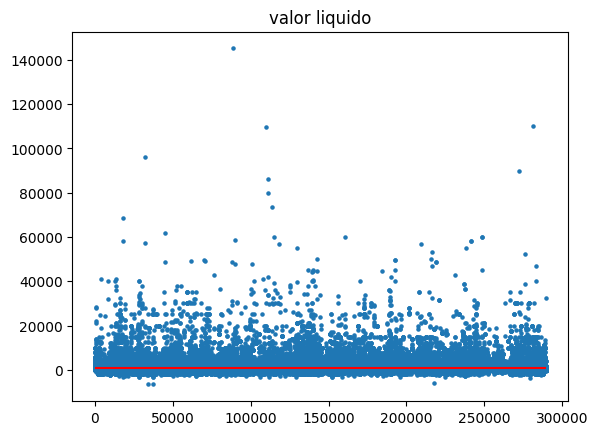

In [67]:
plt.title("valor liquido")

plt.scatter(x=df_reembolso.index, y=df_reembolso["vlrLiquido"], s=5)
plt.hlines(y=df_reembolso["vlrLiquido"].mean(), xmin=0, xmax=df["vlrLiquido"].count(), color="red");

#### Descrição dos dados

In [68]:
df_reembolso["vlrLiquido"].describe()

count    289453.000000
mean        730.239486
std        2083.626830
min       -6605.570000
25%          50.000000
50%         191.840000
75%         715.750000
max      145140.000000
Name: vlrLiquido, dtype: float64

Aqui nós podemos ver que temos valores negativos. Esse valores são referentes a bilhetes de compensação, bilhete de compensação é o bilhete aéreo não voado, que foi reembolsado à Câmara dos Deputados. Portanto, o valor relativo aos bilhetes compensados (não voados) são reembolsados/devolvidos à Casa, deduzindo-se as taxas de cancelamento e de no-show, de acordo com as regras tarifárias da companhia aérea respectiva.

Esse crédito pode voltar para a conta corrente do parlamentar mantida na companhia aérea para ser utilizado com nova emissão de passagem aérea ou poderá voltar para a CEAP do respectivo parlamentar, ficando disponível para utilização com as demais despesas.

Para entender mais, vejam a thread: https://github.com/okfn-brasil/serenata-de-amor/issues/29

#### Explorando mais o caso dos valores negativos

Para entender melhor sobre esses valores, vamos recuperar todos os valores negativos.

In [69]:
negative_documents = df_reembolso[df_reembolso["vlrLiquido"] < 0]
len(negative_documents)

10739

Em teoria, para cada documento negativo, vamos ter outro documento positivo relacionado.

In [71]:
positive_documents = df_reembolso[
    (df_reembolso["ideDocumento"].isin(negative_documents["ideDocumento"]))
    & (df_reembolso["vlrLiquido"] > 0)
]

In [ ]:
positive_documents.iloc[0].to_frame()

Pegando o id do documento desse gasto positivo, podemos encontrar o documento com gasto negativo relacionado.

In [73]:
negative_documents[negative_documents["ideDocumento"] == positive_documents.iloc[0].ideDocumento]

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,numEspecificacaoSubCota,txtDescricaoEspecificacao,txtFornecedor,txtCNPJCPF,txtNumero,indTipoDocumento,datEmissao,vlrDocumento,vlrGlosa,vlrLiquido,numMes,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,datPagamentoRestituicao,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
1759,Fausto Pinato,2.802300e+10,66828.0,355.0,2019,SP,PP,56,998,PASSAGEM AÉREA - SIGEPA,0,NaN,GOL,NaN,GLLN8G,0,2019-12-20T12:00:00,-1318.71,0.0,-1318.71,12,2019,0,Fausto Ruy Pinato,BSB/BSB,0,0.0,NaN,NaN,2917,2203,NaN


In [74]:
len(positive_documents), len(negative_documents)

(601, 10739)

In [75]:
sample = negative_documents[negative_documents.duplicated(subset="ideDocumento")].iloc[
    1
]  # , keep = {‘last’, ‘first’, ‘false’)

In [ ]:
df_reembolso[df_reembolso["ideDocumento"] == sample["ideDocumento"]]

Usando o `std` podemos entender o quanto nosso dado se desvia do 'esperado'.

In [77]:
df_reembolso["vlrLiquido"].std()

2083.6268302833555

### Trabalhando com dados agrupados

Antes de tudo precisaremos converter o campo `datEmissao` para o formato `datetime` (como já fizemos anteriormente)

In [78]:
df_reembolso["datEmissao"] = pd.to_datetime(df_reembolso.datEmissao, format="%Y-%m-%d")

Algumas coisas que podemos é agrupar os registros por datas, para isso iremos utilizar o `groupby` do pandas.

Após isso, poderemos realizar diversos cálculos, como por exemplo, **somar todos os registros presentes em uma data especifica**.

In [79]:
df_reembolso.groupby("datEmissao")["vlrLiquido"].sum().to_frame()

,vlrLiquido
datEmissao,
2018-06-13,3420.40
2018-11-06,1079.00
2018-11-12,1347.18
2018-11-20,3923.15
2018-11-22,2.30
...,...
2020-03-12,3200.00
2020-03-17,3908.56
2020-03-19,30000.00


O que mais podemos fazer com esse dados agrupados, é encontrar a **média** da soma diária de documentos fiscais:

In [80]:
df_reembolso.groupby("datEmissao")["vlrLiquido"].sum().mean()

14893.661144752628

Outros agrupamentos podem ser realizados, como o a seguir:

In [81]:
df_reembolso.groupby("txtDescricao")["vlrLiquido"].sum().to_frame()

,vlrLiquido
txtDescricao,
ASSINATURA DE PUBLICAÇÕES,275892.32
COMBUSTÍVEIS E LUBRIFICANTES.,16519513.53
"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",20457463.41
DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,49187128.01
FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,1280375.53
"HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO FEDERAL.",1765518.07
LOCAÇÃO OU FRETAMENTO DE AERONAVES,1465615.00
LOCAÇÃO OU FRETAMENTO DE EMBARCAÇÕES,105850.00
LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES,26508130.89


Nesse agrupamento, encontramos qual o valor líquido total dos documentos, agrupados por descrição.

Perguntas mais complexas, como "Quais os parlamentares que mais gastaram, a qual partido e a qual estado eles pertencem?", também pode ser respondido agrupando os dados.

In [ ]:
import numpy as np

df_reembolso.groupby(["sgPartido", "sgUF", "txNomeParlamentar"], as_index=False).aggregate(
    {"vlrLiquido": np.sum}
).sort_values(by="vlrLiquido", ascending=False).head()

Por fim, último exemplo que podemos ver hoje é o caso de quais são os fornecedores mais presentes nas solicitações de reembolso.

In [83]:
df_reembolso.groupby(["txtCNPJCPF", "txtFornecedor"], as_index=False).agg(
    {"vlrLiquido": np.nansum}
).sort_values(by="vlrLiquido", ascending=False)[0:20]

,txtCNPJCPF,txtFornecedor,vlrLiquido
1912,020.128.620/0016-0,Cia Aérea - TAM,24922866.52
7240,075.756.510/0015-9,Cia Aérea - GOL,22007041.30
8971,092.962.950/0016-0,Cia Aérea - AZUL,6440767.66
6952,073.193.230/0019-1,PANTANAL VEÍCULOS LTDA,2181274.52
1917,020.128.620/0016-0,TAM LINHAS AEREAS S/A.,1172126.78
2612,025.758.290/0014-8,Cia Aérea - AVIANCA,1137800.63
16156,237.210.170/0013-3,"T2 COMUNICACAO, VIDEO E PRODUCOES EIRELI - EPP",1097334.00
3,000.000.000/0000-1,CELULAR FUNCIONAL,872853.43
2528,025.581.570/0016-2,TELEFÔNICA BRASIL S.A. VIVO,860813.15
2646,026.102.350/0012-0,DMD Gestão Administrativa LTDA - ME,805000.00


## Aula 07: Dados da Receita Federal

Referencias:

- https://www.gov.br/receitafederal/pt-br/assuntos/orientacao-tributaria/cadastros/consultas/dados-publicos-cnpj
- http://200.152.38.155/CNPJ/LAYOUT_DADOS_ABERTOS_CNPJ.pdf


situation (Situação cadastral)

    1 – NULA: o CNPJ torna-se inválido, seja por inconformidade de dados, fraudes ou outros motivos.
    2 – ATIVA: significa que a empresa está em dia com todas as suas pendências, não há nenhuma irregularidade e os pagamentos estão em dia;
    3 – SUSPENSA: a empresa tem pendências com a Receita Federal, não cumpriu com suas obrigações ou pagamentos ou está sendo investigada por possível fraude;
    4 – INAPTA: a empresa está a dois anos ou mais com suspensão e não apresentou os devidos dados contábeis;
    8 – BAIXADA: a empresa foi extinta, seja por solicitação dos sócios ou por ação da Receita;
    
    
situation_date (Data da situação cadastral): DATA DO EVENTO DA SITUACAO CADASTRAL

In [84]:
import requests

url = "https://serenata-de-amor-data.nyc3.digitaloceanspaces.com/2019-11-19-companies.csv.xz"

# fazendo o download do conteúdo do arquivo
r = requests.get(url)

# abrindo um arquivo no seu computador
file = open("2019-11-19-companies.csv.xz", "wb")

# escrever o conteúdo
file.write(r.content)
file.close()

In [85]:
import pandas as pd

DTYPE = {
    "cnpj": str,
}

df_empresas = pd.read_csv(
    "2019-11-19-companies.csv.xz",
    compression="xz",
    dtype=DTYPE,
)
df_empresas.head(1)

,cnpj,partners,secondary_activities,latitude,longitude,opening,main_activity,neighborhood,share_capital,zip_code,main_activity_code,city_code,judicial_nature_code,additional_address_details,removed_from_simples_since,opened_in,opted_for_comples_in,situation_date,special_situation_date,fax_area_code,phone1_area_code,phone2_area_code,address_type,responsible_federative_entity,hq_or_subsidiary_code,address,situation_reason,city,legal_entity,city_abroad_name,trade_name,number,mei,simples,size,administrative_person_category,name,situation,special_situation,phone,type,state,last_updated
0,08771105000156,"[{""id"": 2, ""name"": ""MARLY MORAIS DA GAMA"", ""cn...",NaN,NaN,NaN,NaN,NaN,REALEZA,10000.0,36900000.0,5611201,4787,2062,KM 51,2016-12-31,2007-04-12,2016-01-01,2007-04-12,NaN,33 33331212,33 33331222,33 33312882,AVENIDA,NaN,1,VITORIA MINAS,0,MANHUACU,NaN,NaN,LANCHONETE E RESTAURANTE PEQUENO PRINCIPE,S/N,0,0,1,49,WERNER COMERCIAL DE ALIMENTOS LTDA,2,NaN,NaN,NaN,MG,NaN


In [86]:
df_empresas["situation_date"] = pd.to_datetime(df_empresas["situation_date"], format="%Y-%m-%d")

In [87]:
df_empresas["cnpj"] = df_empresas["cnpj"].str.replace(r"\D", "", regex=True)

In [ ]:
df_empresas.head(5)

In [89]:
df_final = df_reembolso.merge(df_empresas, how="left", left_on="txtCNPJCPF", right_on="cnpj")

In [ ]:
df_final.head(5)

### Exportando o resultado

In [91]:
df_reembolso.to_csv("reembolso-2019-completo.csv")